In [3]:
# KBO 기록실에서 연도별 팀 성적 크롤링
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions as parser
from selenium.webdriver.support.select import Select

# Query 변수
sort_list = {"Hitter" : "BasicOld", "Pitcher" : "BasicOld", "Defense" : "Basic", "Runner" : "Basic"}

# 2001 ~ 2021 팀 성적
kbo_list = list(np.arange(2001, 2022))
year_record = []

for record in kbo_list:
    record = pd.DataFrame()
    year_record.append(record)
    
for i in range(0, len(sort_list)):
    # 드라이버 객체
    driver = webdriver.Chrome(executable_path='D:/conda/chromedriver.exe')
    
    # KBO 기록실 URL
    part_URL = "https://www.koreabaseball.com/Record/Team/"
        
    # 각 기록별 URL
    part_URL += list(sort_list.keys())[i] + "/" + list(sort_list.values())[i] + ".aspx"
    
    driver.get(url=str(part_URL))
    
    if i == 0:
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeries_ddlSeries"))
        select_tag.select_by_value(str(0))
    elif i == 1:
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeries_ddlSeries"))
        select_tag.select_by_value(str(7))
        time.sleep(2)
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeries_ddlSeries"))
        select_tag.select_by_value(str(0))
        
    time.sleep(2)
    
    for j in range(0, 21):
        if i == 0 or i == 1:
            button = driver.find_elements_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpContent"]/div[2]/div/div/a[1]')[0]
            button.click()
            
        time.sleep(2)
            
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason"))
        select_tag.select_by_value(str(j+2001))
        
        time.sleep(2)
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        record_table = soup.find_all('table')
        data = parser.make2d(record_table[0])
        df = pd.DataFrame(data[1:], columns=data[0])
        
        if i == 0:
            year_record[j] = pd.concat([year_record[j], df], ignore_index=True)
        else:
            year_record[j] = pd.merge(year_record[j], df, on='팀명')
            
        if i == 0 or i == 1:
            button = driver.find_elements_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpContent"]/div[2]/div/div/a[2]')[0]
            button.click()
            
            time.sleep(2)
        
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            record_table = soup.find_all('table')
            data = parser.make2d(record_table[0])
            df = pd.DataFrame(data[1:], columns=data[0])
            year_record[j] = pd.merge(year_record[j], df, on='팀명')
            
    driver.close()

pd.set_option('display.max_columns', None)
print(year_record[0].columns)
    
for i in range(len(year_record)):
    year_record[i] = year_record[i].drop(['순위_x', 'G_x', '순위_y', 'AVG_y', 'ERA_y' ,'G_y'], axis=1)
    year_record[i].to_csv('./' + str(kbo_list[i]) + '.csv', index=False)

C:\Users\msi\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: Passing 'suffixes' which cause duplicate columns {'순위_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\msi\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:68: FutureWarning: Passing 'suffixes' which cause duplicate columns {'G_x', '순위_x'} in the result is deprecated and will raise a MergeError in a future version.


Index(['순위_x', '팀명', 'AVG_x', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B_x', '3B_x',
       'HR_x', 'TB', 'RBI', 'SAC_x', 'SF_x', '순위_y', 'AVG_y', 'BB_x', 'IBB_x',
       'HBP_x', 'SO_x', 'GDP', 'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA',
       '순위_x', 'ERA_x', 'G_y', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H_y',
       'HR_y', 'BB_y', 'HBP_y', 'SO_y', 'R_y', 'ER', 'WHIP', '순위_y', 'ERA_y',
       'CG', 'SHO', 'QS', 'BSV', 'TBF', 'NP', 'AVG', '2B_y', '3B_y', 'SAC_y',
       'SF_y', 'IBB_y', 'WP', 'BK', '순위_x', 'G_x', 'E', 'PKO_x', 'PO', 'A',
       'DP', 'FPCT', 'PB', 'SB_x', 'CS_x', 'CS%', '순위_y', 'G_y', 'SBA', 'SB_y',
       'CS_y', 'SB%', 'OOB', 'PKO_y'],
      dtype='object')


In [16]:
# 팀 성적에는 없던 순위 가져오기
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions as parser
from selenium.webdriver.support.select import Select

# 2001 ~ 2021 팀 성적 csv 불러오기
file = []
year_record = []

for i in range(2001, 2022):
    file.append('./' + str(i) + '.csv')
    
for f in file:
    year_record.append(pd.read_csv(f))

# 드라이버 객체
driver = webdriver.Chrome(executable_path='D:/conda/chromedriver.exe')
    
# KBO 기록실 URL
URL = "https://www.koreabaseball.com/TeamRank/TeamRank.aspx"

driver.get(url=str(URL))

for i in range(2001, 2022):
    select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlYear"))
    select_tag.select_by_value(str(i))
    
    time.sleep(2)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    record_table = soup.find('table') #div#cphContents_cphContents_cphContents_udpRecord table')
    data = parser.make2d(record_table)
    df = pd.DataFrame(data[1:], columns=data[0])
    df = df.drop(['승률', '경기', '승', '패', '무', '게임차' ,'최근10경기', '연속', '홈', '방문'], axis=1)
    year_record[i-2001] = pd.merge(year_record[i-2001], df, on='팀명')
    year_record[i-2001].to_csv('./' + str(i) + '_new.csv', index=False)

driver.close()

AVG_x 0.45976360550489914


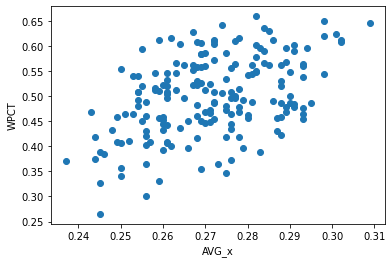

R_x 0.4660857852101359


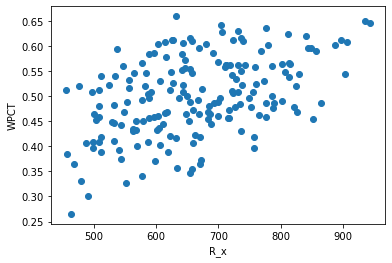

RBI 0.45833188789470336


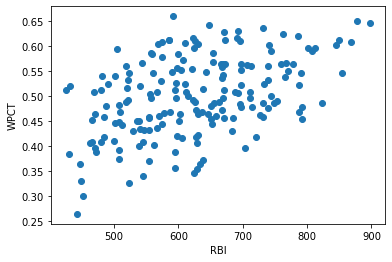

SLG 0.4483750015923957


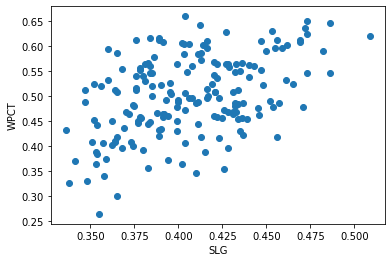

OBP 0.5852839112790086


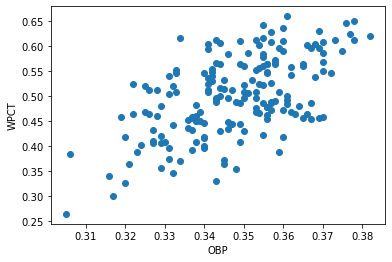

OPS 0.5173638867737653


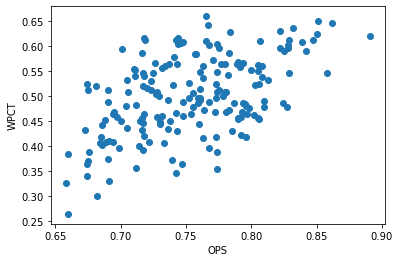

RISP 0.4785205747890358


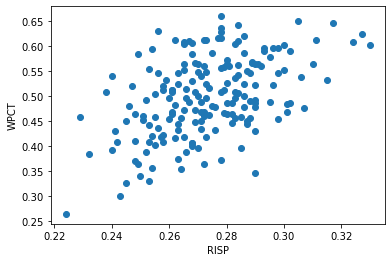

ERA_x -0.5605699589306683


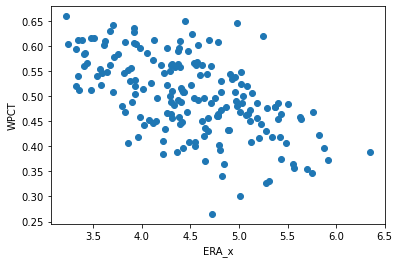

SV 0.6560292627381297


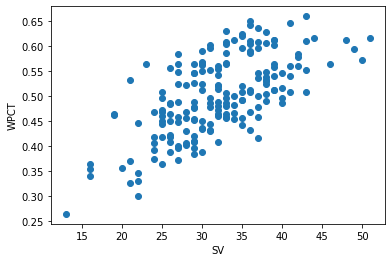

R_y -0.46558158699651414


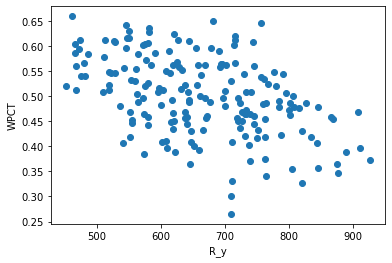

ER -0.4531639842927051


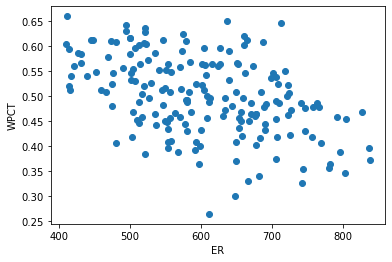

WHIP -0.5682104523922502


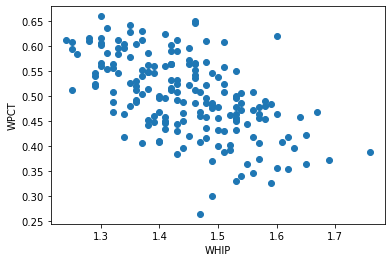

QS 0.4205476495805382


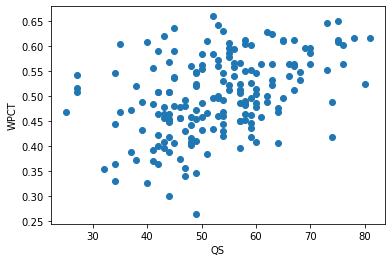

AVG -0.46614014326494635


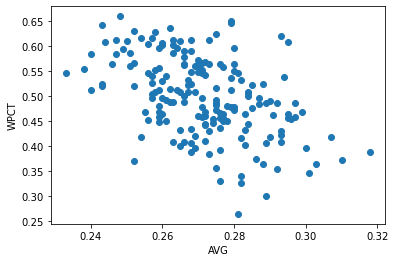

['팀명', 'AVG_x', 'R_x', 'RBI', 'SLG', 'OBP', 'OPS', 'RISP', 'ERA_x', 'SV', 'R_y', 'ER', 'WHIP', 'QS', 'AVG', 'WPCT', '순위']


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2001 ~ 2021 팀 성적 csv 불러오기
file = []
year_record = pd.DataFrame()

for i in range(2001, 2022):
    file.append(pd.read_csv('./' + str(i) + '_new.csv'))
    
# 하나로 합침
for f in file:
    year_record = pd.concat([year_record, f], ignore_index=True)

# 승률과의 상관관계 확인 전 각 컬럼의 속성 확인
'''pd.set_option('display.max_rows', None)
print(year_record.dtypes)
print(len(year_record.columns))''' # columns -> 71개

# object인 팀명, IP 컬럼 제거
#year_record = year_record.drop(['팀명', 'IP'], axis=1)
feature = ['팀명']

for index, col in enumerate(year_record.columns):
    if col == '팀명' or col == 'IP':
        continue
    elif index <= 66 and (0.4 <= year_record[col].corr(year_record['WPCT']) <= 0.7 or -0.7 <= year_record[col].corr(year_record['WPCT']) <= -0.4):
        feature.append(col)
        print(col, year_record[col].corr(year_record['WPCT']))
        plt.scatter(x=year_record[col], y=year_record['WPCT'], label=col)
        plt.xlabel(col)
        plt.ylabel('WPCT')
        plt.show()

feature.append('WPCT')
feature.append('순위')
print(feature)

In [3]:
# 상관관계 값이 해당 범위에 있는 컬럼만 추출
year_record.rename(columns={'팀명':'TEAM', 'ERA_x':'ERA', '순위':'RANK'}, inplace=True)
year_record

,TEAM,AVG_x,PA,AB,R_x,H_x,2B_x,3B_x,HR_x,TB,...,SB_x,CS_x,CS%,SBA,SB_y,CS_y,SB%,OOB,PKO_y,RANK
0,롯데,0.280,5308,4521,718,1265,247,24,121,1923,...,85,58,40.6,159,106,53,66.7,0,0,8
1,KIA,0.278,5189,4542,683,1263,221,17,142,1944,...,100,53,34.6,155,92,63,59.4,0,0,5
2,삼성,0.277,5280,4553,739,1262,244,21,162,2034,...,95,48,33.6,117,73,44,62.4,0,0,2
3,두산,0.276,5303,4583,732,1266,221,26,130,1929,...,126,56,30.8,166,132,34,79.5,0,0,1
4,LG,0.276,5319,4521,669,1247,219,24,85,1769,...,110,55,33.3,154,96,58,62.3,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,NC,0.261,5532,4808,702,1254,203,17,170,2001,...,84,40,32.3,147,101,46,68.7,39,9,7
180,키움,0.259,5653,4874,722,1262,244,28,91,1835,...,85,35,29.2,123,97,26,78.9,39,3,5
181,LG,0.250,5533,4750,654,1188,210,11,110,1750,...,98,40,29.0,126,92,34,73.0,43,15,4
182,KIA,0.248,5577,4831,568,1198,183,21,66,1621,...,92,43,31.9,104,73,31,70.2,46,8,9


In [43]:
# 모든 컬럼을 영어로 변경
df = year_record[feature]
df.rename(columns={'팀명':'TEAM', 'ERA_x':'ERA', '순위':'RANK'}, inplace=True)
df

C:\Users\msi\anaconda3\envs\study\lib\site-packages\pandas\core\frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TEAM,AVG_x,R_x,RBI,SLG,OBP,OPS,RISP,ERA,SV,R_y,ER,WHIP,QS,AVG,WPCT,RANK
0,롯데,0.280,718,671,0.425,0.365,0.790,0.288,4.68,33,670,609,1.50,43,0.276,0.457,8
1,KIA,0.278,683,637,0.428,0.353,0.781,0.272,5.01,28,727,656,1.47,35,0.272,0.469,5
2,삼성,0.277,739,695,0.447,0.360,0.807,0.267,4.39,43,644,579,1.48,51,0.265,0.609,2
3,두산,0.276,732,688,0.421,0.359,0.780,0.278,4.96,35,733,650,1.56,27,0.284,0.508,1
4,LG,0.276,669,630,0.391,0.363,0.754,0.280,5.09,26,732,670,1.60,43,0.277,0.464,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,NC,0.261,702,670,0.416,0.343,0.759,0.260,4.54,33,697,634,1.48,53,0.260,0.496,7
180,키움,0.259,722,671,0.376,0.347,0.723,0.279,4.31,30,700,605,1.46,57,0.264,0.511,5
181,LG,0.250,654,621,0.368,0.342,0.710,0.253,3.57,32,561,505,1.31,50,0.238,0.554,4
182,KIA,0.248,568,546,0.336,0.337,0.673,0.263,4.89,36,752,690,1.50,39,0.265,0.433,9


In [44]:
# train, test set
from sklearn.model_selection import train_test_split

data = df[['AVG_x', 'R_x', 'RBI', 'SLG', 'OBP', 'OPS', 'RISP', 'ERA', 'SV', 'R_y', 'ER', 'WHIP', 'QS', 'AVG']]
label = df['WPCT']

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=34)

In [45]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train

(147, 14) (147,)
(37, 14) (37,)


,AVG_x,R_x,RBI,SLG,OBP,OPS,RISP,ERA,SV,R_y,ER,WHIP,QS,AVG
110,0.287,716,685,0.436,0.369,0.805,0.283,5.19,28,719,654,1.57,46,0.295
46,0.250,488,463,0.357,0.327,0.684,0.268,3.86,28,541,480,1.37,64,0.268
60,0.260,503,465,0.352,0.336,0.688,0.251,4.08,29,555,510,1.38,58,0.256
82,0.269,627,597,0.395,0.357,0.752,0.280,4.10,29,580,530,1.35,59,0.257
97,0.283,669,624,0.416,0.359,0.775,0.298,3.98,31,545,507,1.33,70,0.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.275,685,650,0.432,0.364,0.796,0.275,4.98,32,700,644,1.58,45,0.278
85,0.259,625,585,0.376,0.343,0.719,0.262,3.35,48,513,445,1.33,65,0.263
105,0.301,812,763,0.473,0.377,0.850,0.327,4.52,35,621,575,1.41,63,0.275
122,0.269,653,601,0.399,0.339,0.738,0.245,4.62,25,721,657,1.44,57,0.277


In [47]:
# 회귀 분석 / Model : OLS
from statsmodels.formula.api import ols

df_train = pd.concat([x_train, y_train], axis=1)
model = ols('WPCT ~ AVG_x + R_x + RBI + SLG + OBP + OPS + RISP + ERA + SV + R_y + ER + WHIP + QS + AVG', df_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     135.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.17e-70
Time:                        04:09:07   Log-Likelihood:                 361.68
No. Observations:                 147   AIC:                            -695.4
Df Residuals:                     133   BIC:                            -653.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2247      0.103      2.182      0.031       0.021       0.428
AVG_x         -0.1995      0.358     -0.557      0.579      -0.908       0.509
R_x            0.0004      0.000      1.624      0.107   -8.78e-05       0.001
RBI        -8.813e-06      0.000     -0.033      0.974      -0.001       0.001
SLG           -0.0861      0.125     -0.687      0.494      -0.334       0.162
OBP            0.4788      0.208      2.302      0.023       0.067       0.890
OPS            0.3927      0.133      2.958      0.004       0.130       0.655
RISP           0.1499      0.202      0.741      0.460      -0.250       0.550
ERA           -0.0397      0.020     -1.945      0.054      -0.080       0.001
SV             0.0023      0.000      6.728      0.000       0.002       0.003
R_y           -0.0004      0.000     -2.551      0.012      -0.001      -0.000
ER             0.0002      0.000      0.819      0.414      -0.000       0.001
WHIP           0.0339      0.056      0.609      0.543      -0.076       0.144
QS            -0.0001      0.000     -0.577      0.565      -0.001       0.000
AVG           -0.5711      0.313     -1.824      0.070      -1.190       0.048
==============================================================================
Omnibus:                        5.840   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.399
Skew:                          -0.446   Prob(JB):                       0.0672
Kurtosis:                       3.292   Cond. No.                     4.65e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# 다중공산성 확인(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model.exog, i)}
            for i, column in enumerate(model.exog_names)
            if column != 'Intercept')

C:\Users\msi\anaconda3\envs\study\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,AVG_x,8.530101
1,R_x,227.514813
2,RBI,242.186138
3,SLG,inf
4,OBP,inf
5,OPS,inf
6,RISP,4.626298
7,ERA,53.667501
8,SV,1.759803
9,R_y,110.208692


In [48]:
# 다중공산성 해결 / 1. 정규화 (scale() 함수 사용)
feature = list(df_train.columns)
feature.remove('WPCT')
feature = ["scale({})".format(name) for name in feature]
model2 = ols('WPCT ~ ' + "+".join(feature), data=df_train)
#model = ols('WPCT ~ scale(AVG_x) + scale(R_x) + scale(RBI) + scale(SLG) + scale(OBP) + scale(OPS) + scale(RISP) \
            #+ scale(ERA) + scale(SV) + scale(R_y) + scale(ER) + scale(WHIP) + scale(QS) + scale(AVG)', df)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           5.17e-70
Time:                        01:18:46   Log-Likelihood:                 361.68
No. Observations:                 147   AIC:                            -695.4
Df Residuals:                     133   BIC:                            -653.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4981      0.002    277.973      0.000       0.495       0.502
scale(AVG_x)    -0.0029      0.005     -0.557      0.579      -0.013       0.007
scale(R_x)       0.0439      0.027      1.624      0.107      -0.010       0.097
scale(RBI)      -0.0009      0.028     -0.033      0.974      -0.056       0.054
scale(SLG)       0.0054      0.003      1.544      0.125      -0.002       0.012
scale(OBP)       0.0109      0.004      2.431      0.016       0.002       0.020
scale(OPS)       0.0074      0.003      2.593      0.011       0.002       0.013
scale(RISP)      0.0029      0.004      0.741      0.460      -0.005       0.010
scale(ERA)      -0.0255      0.013     -1.945      0.054      -0.051       0.000
scale(SV)        0.0160      0.002      6.728      0.000       0.011       0.021
scale(R_y)      -0.0480      0.019     -2.551      0.012      -0.085      -0.011
scale(ER)        0.0186      0.023      0.819      0.414      -0.026       0.063
scale(WHIP)      0.0034      0.006      0.609      0.543      -0.008       0.015
scale(QS)       -0.0015      0.003     -0.577      0.565      -0.007       0.004
scale(AVG)      -0.0084      0.005     -1.824      0.070      -0.018       0.001
==============================================================================
Omnibus:                        5.840   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.399
Skew:                          -0.446   Prob(JB):                       0.0672
Kurtosis:                       3.292   Cond. No.                     4.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.41e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model2.exog, i)}
            for i, column in enumerate(model2.exog_names)
            if column != 'Intercept')

C:\Users\msi\anaconda3\envs\study\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,scale(AVG_x),8.530101
1,scale(R_x),227.514813
2,scale(RBI),242.186138
3,scale(SLG),inf
4,scale(OBP),inf
5,scale(OPS),inf
6,scale(RISP),4.626298
7,scale(ERA),53.667501
8,scale(SV),1.759803
9,scale(R_y),110.208692


In [51]:
# 다중공산성 해결 / 2. 변수 제거 (p-value, VIF 고려)
feature = list(df_train.columns)
feature.remove('WPCT')
# p-value, VIF 모두 제일 큰 RBI 제거
feature.remove('RBI')
feature = ["scale({})".format(name) for name in feature]
model3 = ols('WPCT ~ ' + "+".join(feature), data=df_train)
#model = ols('WPCT ~ scale(AVG_x) + scale(R_x) + scale(RBI) + scale(SLG) + scale(OBP) + scale(OPS) + scale(RISP) \
            #+ scale(ERA) + scale(SV) + scale(R_y) + scale(ER) + scale(WHIP) + scale(QS) + scale(AVG)', df)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           4.15e-71
Time:                        01:25:28   Log-Likelihood:                 361.68
No. Observations:                 147   AIC:                            -697.4
Df Residuals:                     134   BIC:                            -658.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4981      0.002    279.015      0.000       0.495       0.502
scale(AVG_x)    -0.0029      0.005     -0.558      0.578      -0.013       0.007
scale(R_x)       0.0431      0.009      4.781      0.000       0.025       0.061
scale(SLG)       0.0053      0.003      1.658      0.100      -0.001       0.012
scale(OBP)       0.0109      0.004      2.449      0.016       0.002       0.020
scale(OPS)       0.0074      0.003      2.720      0.007       0.002       0.013
scale(RISP)      0.0028      0.004      0.750      0.454      -0.005       0.010
scale(ERA)      -0.0255      0.013     -1.968      0.051      -0.051       0.000
scale(SV)        0.0160      0.002      6.774      0.000       0.011       0.021
scale(R_y)      -0.0480      0.019     -2.576      0.011      -0.085      -0.011
scale(ER)        0.0185      0.023      0.821      0.413      -0.026       0.063
scale(WHIP)      0.0034      0.006      0.611      0.542      -0.008       0.014
scale(QS)       -0.0015      0.003     -0.580      0.563      -0.007       0.004
scale(AVG)      -0.0084      0.005     -1.834      0.069      -0.017       0.001
==============================================================================
Omnibus:                        5.806   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.366
Skew:                          -0.445   Prob(JB):                       0.0683
Kurtosis:                       3.287   Cond. No.                     3.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model3.exog, i)}
            for i, column in enumerate(model3.exog_names)
            if column != 'Intercept')

C:\Users\msi\anaconda3\envs\study\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,scale(AVG_x),8.492798
1,scale(R_x),25.454017
2,scale(SLG),inf
3,scale(OBP),inf
4,scale(OPS),inf
5,scale(RISP),4.463989
6,scale(ERA),52.611367
7,scale(SV),1.750023
8,scale(R_y),109.167859
9,scale(ER),160.079085


In [53]:
# 다중공산성 해결 / 2. 변수 제거 (p-value, VIF 고려)
feature = list(df_train.columns)
feature.remove('WPCT')
# p-value, VIF 모두 제일 큰 RBI 제거
feature.remove('RBI')
# p-value가 적당히 크고, VIF가 제일 큰 ER 제거
feature.remove('ER')
feature = ["scale({})".format(name) for name in feature]
model4 = ols('WPCT ~ ' + "+".join(feature), data=df_train)
#model = ols('WPCT ~ scale(AVG_x) + scale(R_x) + scale(RBI) + scale(SLG) + scale(OBP) + scale(OPS) + scale(RISP) \
            #+ scale(ERA) + scale(SV) + scale(R_y) + scale(ER) + scale(WHIP) + scale(QS) + scale(AVG)', df)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           4.44e-72
Time:                        01:27:16   Log-Likelihood:                 361.31
No. Observations:                 147   AIC:                            -698.6
Df Residuals:                     135   BIC:                            -662.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4981      0.002    279.352      0.000       0.495       0.502
scale(AVG_x)    -0.0026      0.005     -0.510      0.611      -0.013       0.008
scale(R_x)       0.0458      0.008      5.488      0.000       0.029       0.062
scale(SLG)       0.0046      0.003      1.490      0.139      -0.002       0.011
scale(OBP)       0.0102      0.004      2.335      0.021       0.002       0.019
scale(OPS)       0.0066      0.003      2.599      0.010       0.002       0.012
scale(RISP)      0.0027      0.004      0.721      0.472      -0.005       0.010
scale(ERA)      -0.0187      0.010     -1.874      0.063      -0.038       0.001
scale(SV)        0.0166      0.002      7.328      0.000       0.012       0.021
scale(R_y)      -0.0353      0.010     -3.434      0.001      -0.056      -0.015
scale(WHIP)      0.0026      0.006      0.478      0.633      -0.008       0.014
scale(QS)       -0.0013      0.003     -0.525      0.600      -0.006       0.004
scale(AVG)      -0.0089      0.005     -1.967      0.051      -0.018    4.72e-05
==============================================================================
Omnibus:                        6.426   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.013
Skew:                          -0.469   Prob(JB):                       0.0495
Kurtosis:                       3.318   Cond. No.                     4.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model4.exog, i)}
            for i, column in enumerate(model4.exog_names)
            if column != 'Intercept')

C:\Users\msi\anaconda3\envs\study\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,scale(AVG_x),8.461989
1,scale(R_x),21.922790
2,scale(SLG),inf
3,scale(OBP),inf
4,scale(OPS),inf
5,scale(RISP),4.457875
6,scale(ERA),31.431032
7,scale(SV),1.605334
8,scale(R_y),33.183140
9,scale(WHIP),9.529800


In [53]:
# 다중공산성 해결 / 2. 변수 제거 (p-value, VIF 고려)
feature = list(df_train.columns)
feature.remove('WPCT')
# p-value, VIF 모두 제일 큰 RBI 제거
feature.remove('RBI')
# p-value가 적당히 크고, VIF가 제일 큰 ER 제거
feature.remove('ER')
# SLG + OBP = OPS이므로, SLG, OBP를 한 번 제거해 봄
feature.remove('SLG')
feature.remove('OBP')
feature = ["scale({})".format(name) for name in feature]
model5 = ols('WPCT ~ ' + "+".join(feature), data=df_train)
#model = ols('WPCT ~ scale(AVG_x) + scale(R_x) + scale(RBI) + scale(SLG) + scale(OBP) + scale(OPS) + scale(RISP) \
            #+ scale(ERA) + scale(SV) + scale(R_y) + scale(ER) + scale(WHIP) + scale(QS) + scale(AVG)', df)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.47e-72
Time:                        04:10:18   Log-Likelihood:                 359.66
No. Observations:                 147   AIC:                            -697.3
Df Residuals:                     136   BIC:                            -664.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4981      0.002    277.255      0.000       0.495       0.502
scale(AVG_x)     0.0011      0.005      0.233      0.816      -0.008       0.011
scale(R_x)       0.0495      0.008      6.078      0.000       0.033       0.066
scale(OPS)       0.0148      0.006      2.303      0.023       0.002       0.028
scale(RISP)      0.0024      0.004      0.627      0.532      -0.005       0.010
scale(ERA)      -0.0158      0.010     -1.595      0.113      -0.035       0.004
scale(SV)        0.0167      0.002      7.355      0.000       0.012       0.021
scale(R_y)      -0.0402      0.010     -4.033      0.000      -0.060      -0.020
scale(WHIP)      0.0051      0.005      0.942      0.348      -0.006       0.016
scale(QS)       -0.0020      0.003     -0.769      0.443      -0.007       0.003
scale(AVG)      -0.0113      0.004     -2.572      0.011      -0.020      -0.003
==============================================================================
Omnibus:                        4.368   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.000
Skew:                          -0.398   Prob(JB):                        0.135
Kurtosis:                       3.143   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model5.exog, i)}
            for i, column in enumerate(model5.exog_names)
            if column != 'Intercept')

,컬럼,VIF
0,scale(AVG_x),7.015746
1,scale(R_x),20.538739
2,scale(OPS),12.841422
3,scale(RISP),4.445847
4,scale(ERA),30.578095
5,scale(SV),1.602368
6,scale(R_y),30.726576
7,scale(WHIP),8.927413
8,scale(QS),2.000522
9,scale(AVG),5.933895


In [55]:
print(res5.params)

Intercept       0.498068
scale(AVG_x)    0.001110
scale(R_x)      0.049483
scale(OPS)      0.014822
scale(RISP)     0.002374
scale(ERA)     -0.015846
scale(SV)       0.016725
scale(R_y)     -0.040157
scale(WHIP)     0.005054
scale(QS)      -0.001954
scale(AVG)     -0.011253
dtype: float64


C:\Users\msi\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


(0.3, 0.7)

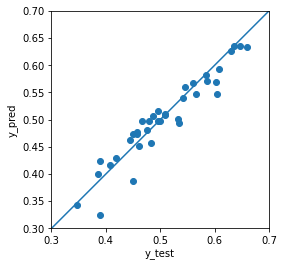

In [56]:
# model5를 가지고 predict() 실행
y_pred = res5.predict(x_test)

x = np.arange(0.3, 0.8, 0.1)
y = np.arange(0.3, 0.8, 0.1)
plt.plot(x,y)

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.axes().set_aspect('equal')

plt.xlim([0.3, 0.7])
plt.ylim([0.3, 0.7])

In [48]:
# 유의미하지 않은 독립변수 제거(p-value 값이 높은 변수)
feature = list(df_train.columns)
feature.remove('WPCT')
# p-value, VIF 모두 제일 큰 RBI 제거
feature.remove('RBI')
# p-value가 적당히 크고, VIF가 제일 큰 ER 제거
feature.remove('ER')
# SLG + OBP = OPS이므로, SLG, OBP를 한 번 제거해 봄
feature.remove('SLG')
feature.remove('OBP')
# AVG_x, RISP, WHIP, QS 제거 -> ERA의 p-value값이 대폭 상승하여 제거해봄
feature.remove('AVG_x')
feature.remove('RISP')
feature.remove('WHIP')
feature.remove('QS')
feature.remove('ERA')
feature = ["scale({})".format(name) for name in feature]
model6 = ols('WPCT ~ ' + "+".join(feature), data=df_train)
#model = ols('WPCT ~ scale(AVG_x) + scale(R_x) + scale(RBI) + scale(SLG) + scale(OBP) + scale(OPS) + scale(RISP) \
            #+ scale(ERA) + scale(SV) + scale(R_y) + scale(ER) + scale(WHIP) + scale(QS) + scale(AVG)', df)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPCT   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     354.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.87e-78
Time:                        04:09:22   Log-Likelihood:                 357.91
No. Observations:                 147   AIC:                            -703.8
Df Residuals:                     141   BIC:                            -685.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4981      0.002    278.954      0.000       0.495       0.502
scale(R_x)     0.0566      0.005     12.047      0.000       0.047       0.066
scale(OPS)     0.0111      0.004      2.652      0.009       0.003       0.019
scale(SV)      0.0169      0.002      7.569      0.000       0.012       0.021
scale(R_y)    -0.0517      0.004    -13.034      0.000      -0.060      -0.044
scale(AVG)    -0.0107      0.003     -3.288      0.001      -0.017      -0.004
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.590
Skew:                          -0.323   Prob(JB):                        0.274
Kurtosis:                       2.928   Cond. No.                         6.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
pd.DataFrame({'컬럼':column, 'VIF':variance_inflation_factor(model6.exog, i)}
            for i, column in enumerate(model6.exog_names)
            if column != 'Intercept')

,컬럼,VIF
0,scale(R_x),6.919940
1,scale(OPS),5.520951
2,scale(SV),1.566387
3,scale(R_y),4.930632
4,scale(AVG),3.340335


C:\Users\msi\anaconda3\envs\study\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


(0.3, 0.7)

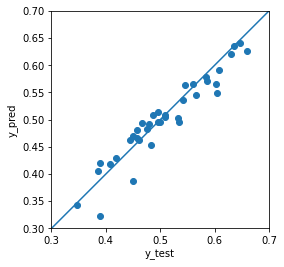

In [52]:
# model6를 가지고 predict() 실행
y_pred = res6.predict(x_test)

x = np.arange(0.3, 0.8, 0.1)
y = np.arange(0.3, 0.8, 0.1)
plt.plot(x,y)

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.axes().set_aspect('equal')
plt.xlim([0.3, 0.7])
plt.ylim([0.3, 0.7])

In [1]:
# KBO 기록실에서 2018~2021년도 월별 한화 선수 성적 크롤링
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions as parser
from selenium.webdriver.support.select import Select

# Query 변수
sort_list = {"HitterBasic" : "BasicOld", "PitcherBasic" : "BasicOld"}
month = ["3,4", "5", "6", "7", "8", "9,10,11,12"]

# 2018 ~ 2021 선수 성적
kbo_list = list(np.arange(2018, 2022))
year_record = []

for record in kbo_list:
    record = pd.DataFrame()
    year_record.append(record)
    
for i in range(0, len(sort_list)):
    # 드라이버 객체
    driver = webdriver.Chrome(executable_path='D:/conda/chromedriver.exe')
    
    # KBO 기록실 URL
    part_URL = "https://www.koreabaseball.com/Record/Player/"
        
    # 각 기록별 URL
    part_URL += list(sort_list.keys())[i] + "/" + list(sort_list.values())[i] + ".aspx"
    
    driver.get(url=str(part_URL))
    
    # 정규시즌 선택
    select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeries_ddlSeries"))
    select_tag.select_by_value(str(0))
        
    time.sleep(2)
    
    for j in range(0, 4):   
        # 년도 선택
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason"))
        select_tag.select_by_value(str(kbo_list[j]))
        
        time.sleep(2)
        
        # 팀 선택 (한화)
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam"))
        select_tag.select_by_value("HH")

        time.sleep(2)
            
        # 상황 선택
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSituation_ddlSituation"))
        select_tag.select_by_value("MONTH_SC")
        
        time.sleep(2)
        
        for k in range(0, 6):
            # 월별 선택
            select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSituationDetail_ddlSituationDetail"))
            select_tag.select_by_value(month[k])
        
            time.sleep(2)

            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            record_table = soup.find_all('table')
            data = parser.make2d(record_table[0])
            df = pd.DataFrame(data[1:], columns=data[0])
            df = df.drop(['순위', '팀명'], axis=1)
            year_record[j] = pd.concat([year_record[j], df], ignore_index=True)

            year_record[j].to_csv('./한화' + '_' + str(list(sort_list.keys())[i]) + "_" + month[k]
                                  + '_' + str(kbo_list[j]) + '.csv', index=False)
            
            # DataFrame 초기화
            year_record[j] = pd.DataFrame()
            
    driver.close()

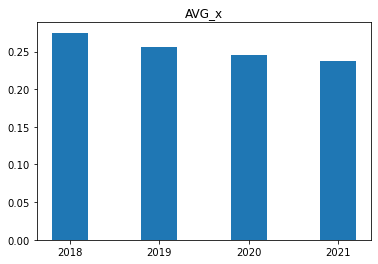

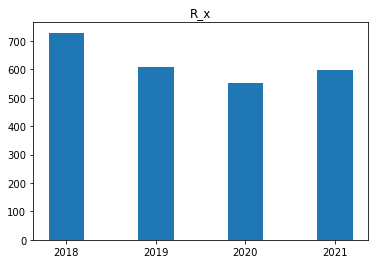

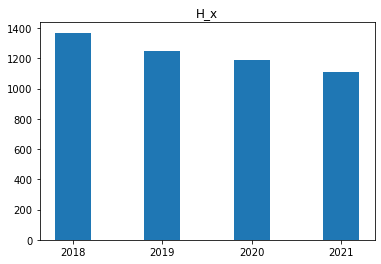

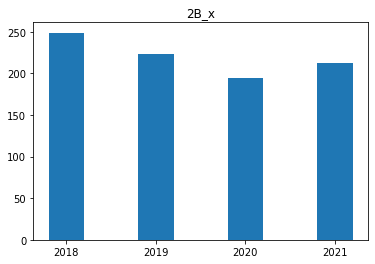

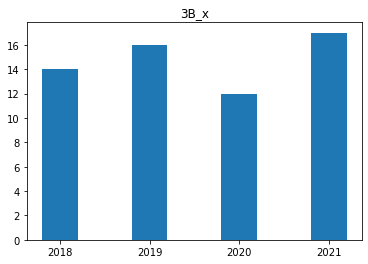

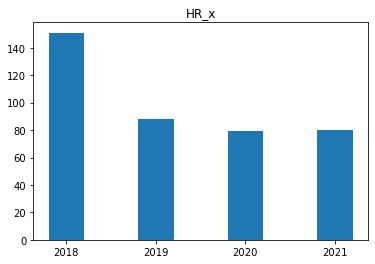

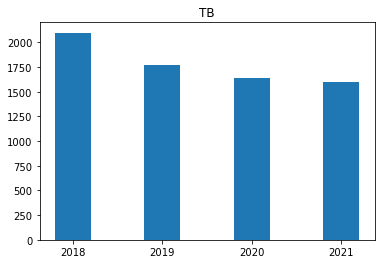

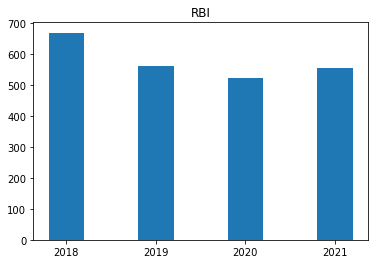

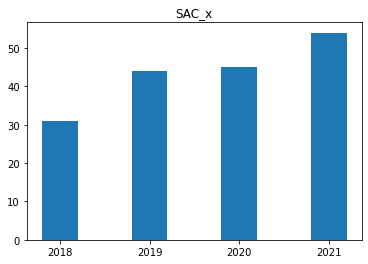

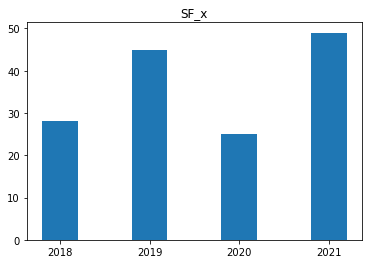

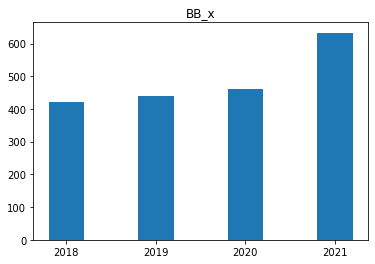

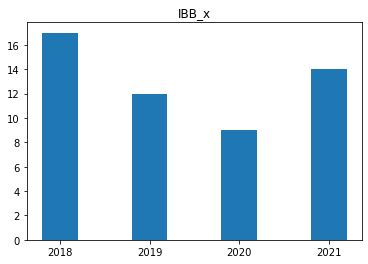

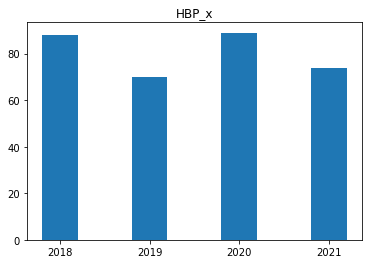

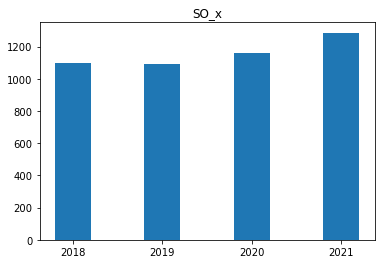

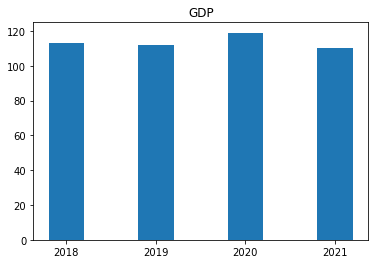

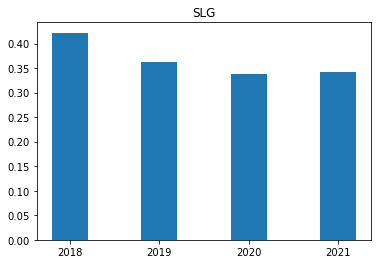

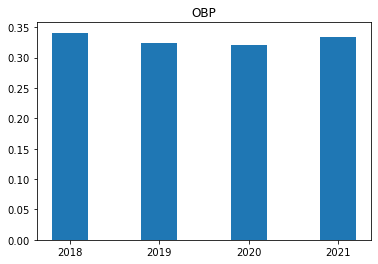

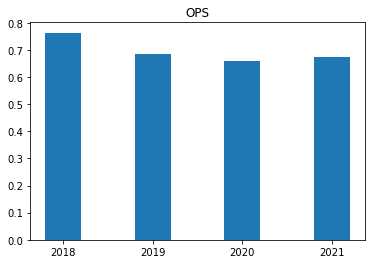

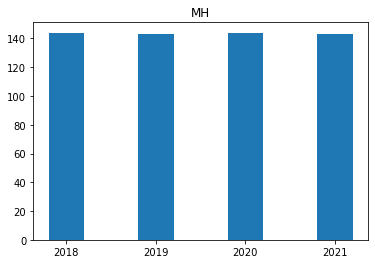

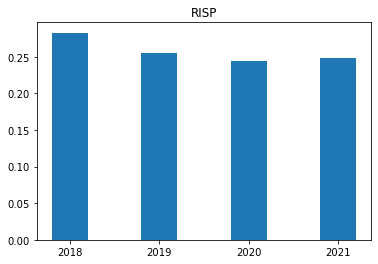

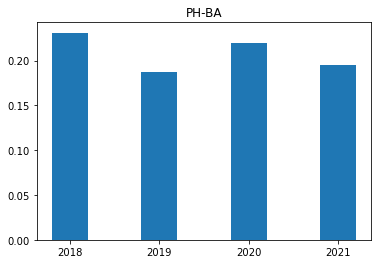

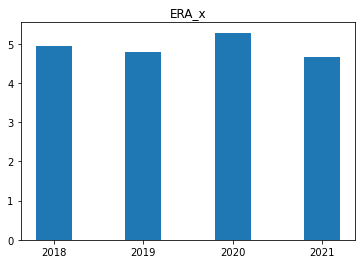

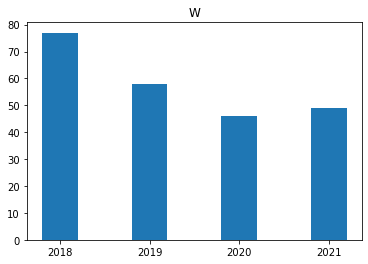

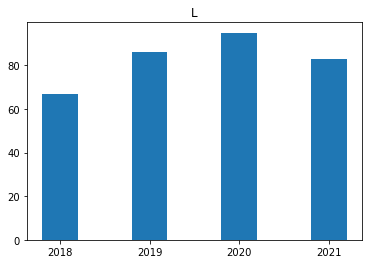

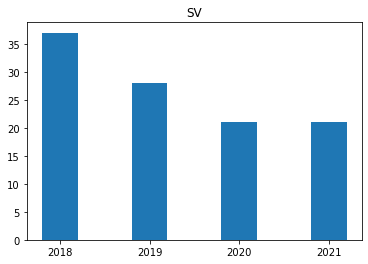

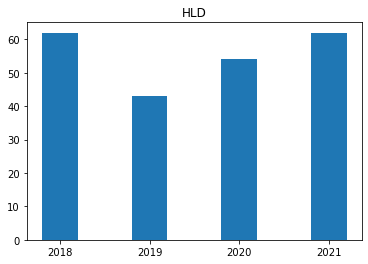

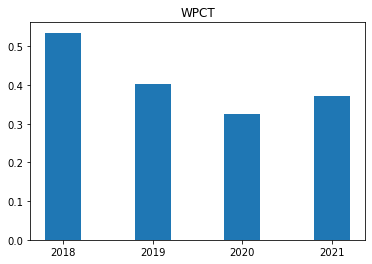

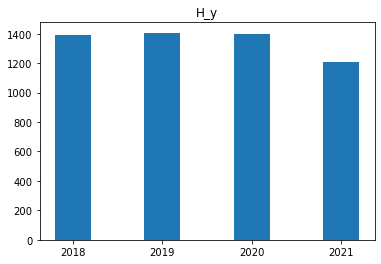

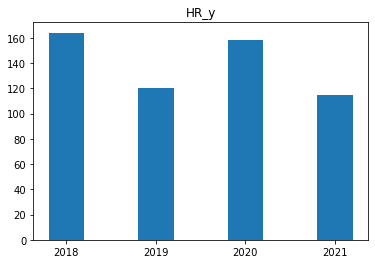

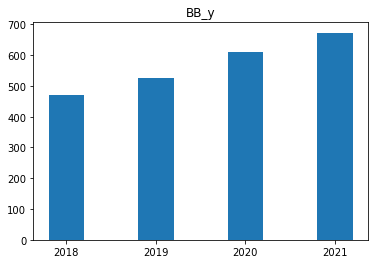

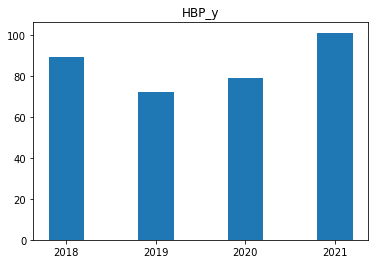

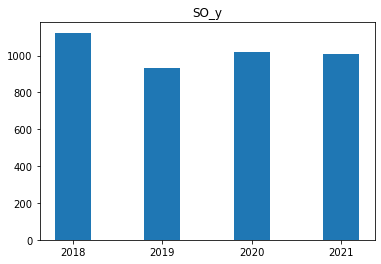

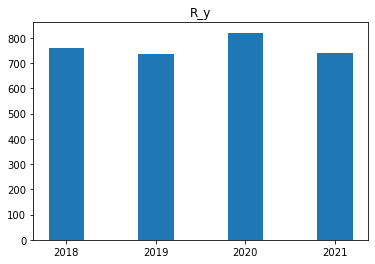

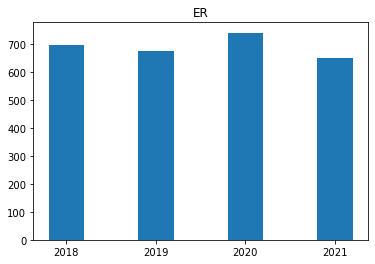

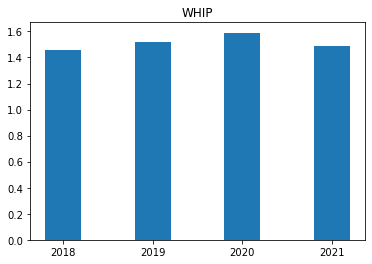

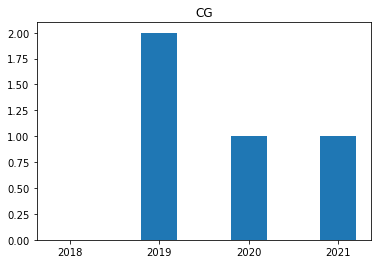

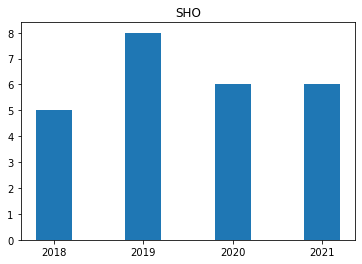

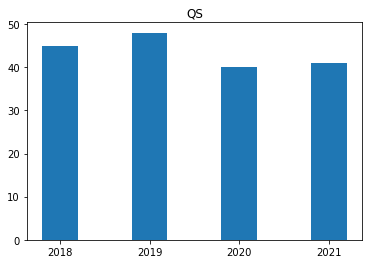

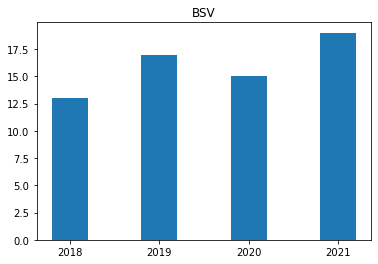

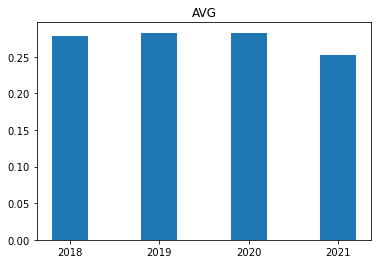

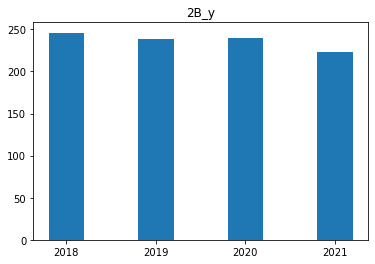

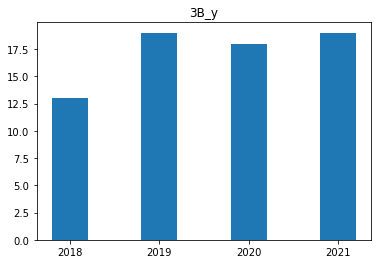

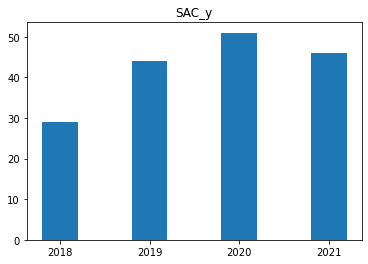

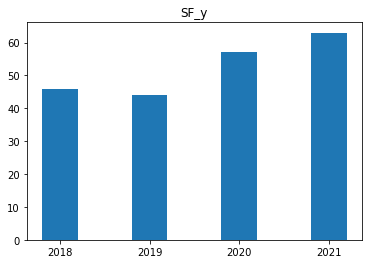

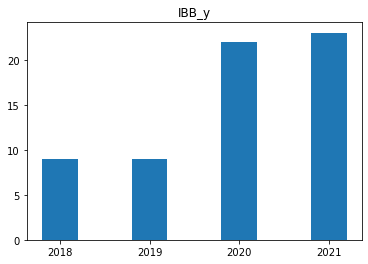

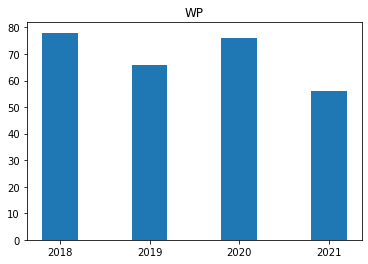

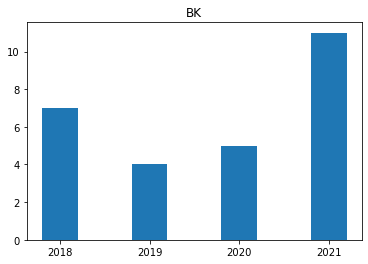

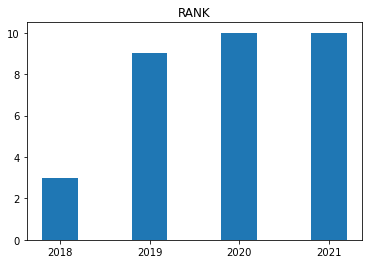

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2018 ~ 2021 팀 성적 csv 불러오기
file = []
year_record = pd.DataFrame()

for i in range(2018, 2022):
    file.append(pd.read_csv('./' + str(i) + '_new.csv'))
    
# 하나로 합침
for f in file:
    year_record = pd.concat([year_record, f], ignore_index=True)
    
# 한화 팀 성적만 추출
df = year_record.loc[year_record['팀명'] == '한화']
df.rename(columns={'팀명':'TEAM', '순위':'RANK'}, inplace=True)

df = df.drop(['PA', 'AB', 'IP', 'TBF', 'NP', 'E', 'PKO_x', 'PO', 'A', 'DP', 'FPCT', 'PB', 
              'SB_x', 'CS_x', 'CS%', 'SBA', 'SB_y', 'CS_y', 'SB%', 'OOB', 'PKO_y'], axis=1)

x = [1, 2, 3, 4]
year = [2018, 2019, 2020, 2021]

# 막대그래프
for i in range(1, 49):
    plt.title(df.columns[i])
    plt.bar(x, df[df.columns[i]], width=0.4)
    plt.xticks(x, year)
    plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2019 ~ 2021 팀 성적 csv 불러오기
file = []
year_record = []

for i in range(2019, 2022):
    year_record.append(pd.read_csv('./' + str(i) + '_new.csv'))
    year_record[i-2019] = year_record[i-2019][['팀명', 'R_x', 'OPS', 'SV', 'R_y', 'AVG']]
    for j in range(0, 10):
        if year_record[i-2019]['팀명'][j] == 'SK':
            year_record[i-2019]['팀명'][j] = 'SSG'
    year_record[i-2019] = year_record[i-2019].sort_values(by=['팀명'], axis=0)
    year_record[i-2019].index = [0,1,2,3,4,5,6,7,8,9]
team = year_record[0]['팀명']
    
# 3년간의 팀 성적 평균으로 예측
data = year_record[0][['R_x', 'OPS', 'SV', 'R_y', 'AVG']].add(year_record[1][['R_x', 'OPS', 'SV', 'R_y', 'AVG']].\
                                                              add(year_record[2][['R_x', 'OPS', 'SV', 'R_y', 'AVG']])) 
data /= 3
print(team)
data.loc[[2, 9], :]

0    KIA
1     KT
2     LG
3     NC
4    SSG
5     두산
6     롯데
7     삼성
8     키움
9     한화
Name: 팀명, dtype: object


,R_x,OPS,SV,R_y,AVG
2,699.000000,0.732667,34.666667,629.333333,0.255333
9,585.666667,0.673000,23.333333,765.333333,0.272333


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2019 ~ 2021 팀 성적 csv 불러오기
file = []
year_record = []

for i in range(2019, 2022):
    year_record.append(pd.read_csv('./' + str(i) + '_new.csv'))
    year_record[i-2019] = year_record[i-2019][['팀명', 'R_x', 'OPS', 'SV', 'R_y', 'AVG']]
    for j in range(0, 10):
        if year_record[i-2019]['팀명'][j] == 'SK':
            year_record[i-2019]['팀명'][j] = 'SSG'
    year_record[i-2019] = year_record[i-2019].sort_values(by=['팀명'], axis=0)
    year_record[i-2019].index = [0,1,2,3,4,5,6,7,8,9]
team = year_record[0]['팀명']
    
# 3년간의 팀 성적 평균으로 예측
data = year_record[0][['R_x', 'OPS', 'SV', 'R_y', 'AVG']].add(year_record[1][['R_x', 'OPS', 'SV', 'R_y', 'AVG']].\
                                                              add(year_record[2][['R_x', 'OPS', 'SV', 'R_y', 'AVG']])) 
data /= 3
print(team)
print(data)

# model6를 가지고 predict() 실행
y_pred = res6.predict(data)

next_year = pd.DataFrame(columns=['팀명', '승률'])
next_year['팀명'] = team
next_year['승률'] = y_pred
next_year = next_year.sort_values(by=['승률'], axis=0, ascending=False)
next_year.index = [1,2,3,4,5,6,7,8,9,10]
next_year

0    KIA
1     KT
2     LG
3     NC
4    SSG
5     두산
6     롯데
7     삼성
8     키움
9     한화
Name: 팀명, dtype: object
          R_x       OPS         SV         R_y       AVG
0  632.333333  0.711000  33.000000  756.666667  0.275000
1  727.333333  0.753333  34.333333  653.333333  0.261000
2  699.000000  0.732667  34.666667  629.333333  0.255333
3  754.666667  0.782667  32.000000  680.666667  0.260667
4  681.333333  0.734667  32.000000  711.000000  0.264667
5  763.333333  0.758667  31.666667  633.666667  0.266667
6  685.000000  0.730000  26.000000  764.000000  0.274667
7  677.666667  0.731000  33.333333  711.333333  0.268333
8  753.666667  0.751333  37.000000  654.666667  0.265667
9  585.666667  0.673000  23.333333  765.333333  0.272333


,팀명,승률
1,두산,0.569140
2,키움,0.566093
3,NC,0.552758
4,KT,0.550382
5,LG,0.547356
6,SSG,0.486032
7,삼성,0.483715
8,롯데,0.439398
9,KIA,0.428052
10,한화,0.369110


In [77]:
np.sum(next_year['승률'])

4.992035878268989

In [11]:
# KBO 기록실에서 연도별 선수 성적 크롤링
import numpy as np
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions as parser
from selenium.webdriver.support.select import Select

# Query 변수
sort_list = {"HitterBasic" : "BasicOld", "PitcherBasic" : "BasicOld"}
team_list = {"두산" : "OB", "롯데" : "LT", "삼성" : "SS", "키움" : "WO", "한화" : "HH",
             "KIA" : "HT", "KT" : "KT", "LG" : "LG", "NC" : "NC", "SSG" : "SK"}

# 2018 ~ 2021 선수 성적
kbo_list = list(np.arange(2019, 2022))
year_record = []

for record in kbo_list:
    record = pd.DataFrame()
    year_record.append(record)
    
for i in range(0, len(sort_list)):
    # 드라이버 객체
    driver = webdriver.Chrome(executable_path='D:/conda/chromedriver.exe')
    
    # KBO 기록실 URL
    part_URL = "https://www.koreabaseball.com/Record/Player/"
        
    # 각 기록별 URL
    part_URL += list(sort_list.keys())[i] + "/" + list(sort_list.values())[i] + ".aspx"
    
    driver.get(url=str(part_URL))
    
    select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeries_ddlSeries"))
    select_tag.select_by_value(str(0))
        
    time.sleep(2)
    
    for j in range(0, 3):   
        select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlSeason_ddlSeason"))
        select_tag.select_by_value(str(kbo_list[j]))
        
        time.sleep(2)
        
        for k in range(0, 10):
            select_tag = Select(driver.find_element_by_id("cphContents_cphContents_cphContents_ddlTeam_ddlTeam"))
            select_tag.select_by_value(list(team_list.values())[k])

            time.sleep(2)
            
            button = driver.find_elements_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpContent"]/div[2]/div[2]/a[1]')[0]
            button.click()
            
            time.sleep(2)

            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            record_table = soup.find_all('table')
            data = parser.make2d(record_table[0])
            df = pd.DataFrame(data[1:], columns=data[0])
            df = df.drop(['순위'], axis=1)
            year_record[j] = pd.concat([year_record[j], df], ignore_index=True)

            button = driver.find_elements_by_xpath('//*[@id="cphContents_cphContents_cphContents_udpContent"]/div[2]/div[2]/a[2]')[0]
            button.click()

            time.sleep(2)

            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            record_table = soup.find_all('table')
            data = parser.make2d(record_table[0])
            df = pd.DataFrame(data[1:], columns=data[0])
            df = df.drop(['순위', '팀명'], axis=1)
            year_record[j] = pd.merge(year_record[j], df, on='선수명')

            year_record[j].to_csv('./' + str(list(team_list.keys())[k]) + '_' + str(list(sort_list.keys())[i])
                                  + '_' + str(kbo_list[j]) + '.csv', index=False)
            
            # DataFrame 초기화
            year_record[j] = pd.DataFrame()
            
    driver.close()